In [1]:
# Import-a-ton
import pandas as pd
import pickle
import matplotlib.pyplot as plt
%matplotlib inline  

# Epicurious

Having a look at the recipes dataset.

In [2]:
# Load the dataset
epicurious = './datasets/epicurious/epi_r.csv'
df = pd.read_csv(epicurious)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20052 entries, 0 to 20051
Columns: 680 entries, title to turkey
dtypes: float64(679), object(1)
memory usage: 104.0+ MB


In [4]:
df.columns

Index([u'title', u'rating', u'calories', u'protein', u'fat', u'sodium',
       u'#cakeweek', u'#wasteless', u'22-minute meals',
       u'3-ingredient recipes',
       ...
       u'yellow squash', u'yogurt', u'yonkers', u'yuca', u'zucchini',
       u'cookbooks', u'leftovers', u'snack', u'snack week', u'turkey'],
      dtype='object', length=680)

In [5]:
df['rating'].describe()

count    20052.000000
mean         3.714467
std          1.340829
min          0.000000
25%          3.750000
50%          4.375000
75%          4.375000
max          5.000000
Name: rating, dtype: float64

In [6]:
# Columns with null values
df.columns[df.isnull().any()].tolist()

['calories', 'protein', 'fat', 'sodium']

In [7]:
# Don't really need these columns...drop!
df = df.drop(columns=df.columns[df.isnull().any()].tolist())

In [8]:
df.head()

,title,rating,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,advance prep required,alabama,alaska,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
# Check for duplicated rows
df[df.duplicated('title', keep=False)].head()

,title,rating,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,advance prep required,alabama,alaska,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
14,Peach Mustard,3.125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17,Crisp Braised Pork Shoulder,4.375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24,Sea Salt-Roasted Pecans,3.750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25,Garlic Baguette Crumbs,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27,Dried Pear Crisps,2.500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
# How many duplicated rows are there?
df.duplicated('title', keep=False).sum()

4219

In [11]:
# Checking one:
df[df['title']=='Dried Pear Crisps ']

,title,rating,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,advance prep required,alabama,alaska,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
27,Dried Pear Crisps,2.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9083,Dried Pear Crisps,2.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
# Drop the duplicates
df.drop_duplicates(subset='title', keep='first', inplace=True)

In [13]:
# After dropping duplicates, reset the index
df.reset_index(drop=True, inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17736 entries, 0 to 17735
Columns: 676 entries, title to turkey
dtypes: float64(675), object(1)
memory usage: 91.5+ MB


In [15]:
# Checking the ratings column, most important!
df['rating'].value_counts()

4.375    7180
3.750    4645
5.000    2304
0.000    1568
3.125    1323
2.500     473
1.250     139
1.875     104
Name: rating, dtype: int64

In [16]:
# Drop the whitespace at the end of the title cells
df['title'] = df['title'].str.strip()

# Recipes

Extracting just the recipes, their titles, ratings, and preparation details.

In [17]:
recipes = df.iloc[:,:8]

In [18]:
# Don't need #cakeweek an #wasteless
recipes = recipes.drop(columns=['#cakeweek','#wasteless'])

In [19]:
recipes['22-minute meals'].value_counts()

0.0    17719
1.0       17
Name: 22-minute meals, dtype: int64

In [20]:
recipes['3-ingredient recipes'].value_counts()

0.0    17709
1.0       27
Name: 3-ingredient recipes, dtype: int64

In [21]:
recipes['30 days of groceries'].value_counts()

0.0    17729
1.0        7
Name: 30 days of groceries, dtype: int64

In [22]:
recipes['advance prep required'].value_counts()

0.0    17636
1.0      100
Name: advance prep required, dtype: int64

In [23]:
# Change binary columns to int64
binary_columns = ['22-minute meals',
                  '3-ingredient recipes',
                  '30 days of groceries',
                  'advance prep required']

recipes[binary_columns] = recipes[binary_columns].astype('int64')

In [24]:
recipes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17736 entries, 0 to 17735
Data columns (total 6 columns):
title                    17736 non-null object
rating                   17736 non-null float64
22-minute meals          17736 non-null int64
3-ingredient recipes     17736 non-null int64
30 days of groceries     17736 non-null int64
advance prep required    17736 non-null int64
dtypes: float64(1), int64(4), object(1)
memory usage: 831.4+ KB


In [25]:
recipes.head()

,title,rating,22-minute meals,3-ingredient recipes,30 days of groceries,advance prep required
0,"Lentil, Apple, and Turkey Wrap",2.500,0,0,0,0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,0,0,0,0
2,Potato and Fennel Soup Hodge,3.750,0,0,0,0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,0,0,0,0
4,Spinach Noodle Casserole,3.125,0,0,0,0


# Ingredients

Taking just the binary ingredients columns.

In [26]:
ingredients = df.iloc[:,8:].copy()

In [27]:
# All binary columns; change them all to integers
ingredients = ingredients.astype('int64')

In [28]:
ingredients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17736 entries, 0 to 17735
Columns: 668 entries, alabama to turkey
dtypes: int64(668)
memory usage: 90.4 MB


In [29]:
list_of_ingredients = ingredients.columns.tolist()

In [30]:
# Pickle!
pickle.dump(list_of_ingredients,open('epi_list_ingredients.p','wb'))

In [31]:
# Average number of ingredients required
ingredients.sum(axis=1, numeric_only=True).mean()

12.364287325214253

# Cleaning Further Across both Datasets

In [32]:
# Bring in the pickled list of ingredients
list_of_ingredients = pickle.load(open('epi_list_ingredients.p', 'rb'))

In [33]:
list_of_ingredients[:5]

['alabama', 'alaska', 'alcoholic', 'almond', 'amaretto']

In [34]:
# Getting rid of the state names
#
# Using dataset from the internet
state_names = pd.read_csv('./us_cities_states_counties.csv', sep='|')

In [35]:
state_names.head()

,City,State short,State full,County,City alias
0,Holtsville,NY,New York,SUFFOLK,Internal Revenue Service
1,Holtsville,NY,New York,SUFFOLK,Holtsville
2,Adjuntas,PR,Puerto Rico,ADJUNTAS,URB San Joaquin
3,Adjuntas,PR,Puerto Rico,ADJUNTAS,Jard De Adjuntas
4,Adjuntas,PR,Puerto Rico,ADJUNTAS,Colinas Del Gigante


In [36]:
state_names_list = state_names['State full'].drop_duplicates(keep='last', inplace=False).str.lower().tolist()

In [37]:
state_names_list[:5]

['virgin islands',
 'puerto rico',
 'massachusetts',
 'rhode island',
 'new hampshire']

In [38]:
type(state_names_list)

list

In [39]:
# Remove those in the state_names list
epi_ingredients = ingredients.columns[~ingredients.columns.isin(state_names_list)]

In [40]:
epi_ingredients = epi_ingredients.tolist()

In [41]:
# Remove Unicode characters
epi_ingredients_clean = []
for x in epi_ingredients:
    try:
        epi_ingredients_clean.append(x.encode('ascii','ignore'))
    except UnicodeDecodeError:
        pass

In [42]:
epi_ingredients_clean[:10]

['alcoholic',
 'almond',
 'amaretto',
 'anchovy',
 'anise',
 'anniversary',
 'anthony bourdain',
 'aperitif',
 'appetizer',
 'apple']

In [43]:
# Remove these ones manually cause they are just slightly more manageable at this point
remove_manually = ['epi + ushg','epi loves the microwave','anthony bourdain']

In [44]:
epi_ingredients_clean_ = [x for x in epi_ingredients_clean if x not in remove_manually]

In [45]:
len(epi_ingredients_clean_)

609

In [46]:
# Extract only the cleaned columns
epi_ingredients_clean_df = ingredients[epi_ingredients_clean_]

In [47]:
epi_ingredients_clean_df.head()

,alcoholic,almond,amaretto,anchovy,anise,anniversary,aperitif,appetizer,apple,apple juice,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
# Average number of ingredients required
epi_ingredients_clean_df.sum(axis=1, numeric_only=True).mean()

11.72051195308976

The average is still almost the same so we haven't lost too much information from the column dropping.

In [49]:
number_of_ingredients_per_recipe = epi_ingredients_clean_df.sum(axis=1).to_frame('sum_of_ingredients')

In [50]:
number_of_ingredients_per_recipe.head()

,sum_of_ingredients
0,11
1,10
2,6
3,15
4,9


In [51]:
len(number_of_ingredients_per_recipe)

17736

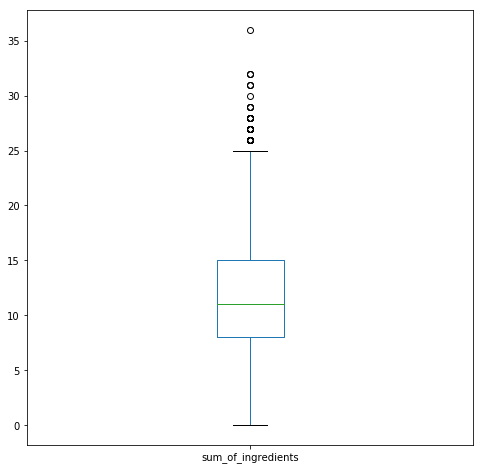

In [52]:
# How does it look like?
number_of_ingredients_per_recipe.plot(y='sum_of_ingredients', use_index=True, kind='box',figsize=(8,8))
plt.show()

In [53]:
# Any zero ingredients recipes?
zero_ingredients = number_of_ingredients_per_recipe[number_of_ingredients_per_recipe['sum_of_ingredients']==0]
zero_ingredients

,sum_of_ingredients
384,0
1422,0
1516,0
1517,0
2131,0
2649,0
3814,0
5043,0
5117,0
9829,0


In [54]:
zero_ingredients_list = zero_ingredients.index.tolist()

Hmmmm, I suppose I can remove them from my dataset.

In [55]:
epi_clean = pd.concat([recipes,epi_ingredients_clean_df], axis=1)

In [56]:
epi_clean.head()

,title,rating,22-minute meals,3-ingredient recipes,30 days of groceries,advance prep required,alcoholic,almond,amaretto,anchovy,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,Boudin Blanc Terrine with Red Onion Confit,4.375,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Potato and Fennel Soup Hodge,3.750,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Spinach Noodle Casserole,3.125,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
# Let's check what are these zero ingredients recipes...
epi_clean.loc[epi_clean.index.isin(zero_ingredients_list)]

,title,rating,22-minute meals,3-ingredient recipes,30 days of groceries,advance prep required,alcoholic,almond,amaretto,anchovy,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
384,Jalapeño Agave,0.000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1422,Barley and Mushroom Pilaf,0.000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1516,"Rice Pudding with Ginger, Amaranth, and Mango",0.000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1517,Herb Salt,0.000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2131,Sesame Sauce,0.000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2649,Asian Lamb Stir-Fry in Radicchio Wraps,0.000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3814,Momiji Oroshi,0.000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5043,Apricot-Riesling Jam,0.000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5117,Ras-El-Hanout,4.375,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9829,Pomegranate and Fennel Glazed Rack of Lamb,5.000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Very drop-able. Pity about 5117 and 9829, but it's ok...

In [58]:
epi_clean.drop(zero_ingredients_list, inplace=True)

In [59]:
epi_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17724 entries, 0 to 17735
Columns: 615 entries, title to turkey
dtypes: float64(1), int64(613), object(1)
memory usage: 83.3+ MB


In [60]:
epi_recipes_clean = epi_clean.iloc[:,:6].copy()

In [61]:
# Write to CSV
epi_recipes_clean.to_csv('./datasets/epicurious/epi_recipes_clean.csv', index=False)

In [62]:
epi_ingredients_clean = epi_clean.iloc[:,6:].copy()

In [63]:
# Write to CSV
epi_ingredients_clean.to_csv('./datasets/epicurious/epi_ingredients_clean.csv', index=False)